In [1]:
import pandas as pd

In [39]:
movies = pd.read_csv("../The movie database/tmdb_5000_movies.csv")
credits = pd.read_csv("../The movie database/tmdb_5000_credits.csv")

In [40]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


## Q2

In [6]:
movies["revenue"].sum()

395097847444

In [8]:
movies["revenue"].sort_values(ascending=False)

0       2787965087
25      1845034188
16      1519557910
28      1513528810
44      1506249360
           ...    
3200             0
3199             0
3197             0
3194             0
4802             0
Name: revenue, Length: 4803, dtype: int64

## Q3

In [10]:
# Q3.1 Créer une colonne release_year contenant l'année de sortie du film

In [18]:
movies.dropna(subset=["release_date"], inplace=True)

In [23]:
# Méthode 1
movies["release_year"] = movies["release_date"].apply(lambda x: x.split("-")[0])  # x[:4]

In [26]:
# Méthode 2
from datetime import datetime
movies["release_year"] = movies["release_date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)  # x[:4]

In [43]:
# Méthode 3
movies["release_year"] = pd.to_datetime(movies["release_date"]).dt.year

In [44]:
# Q3.2 Colonne profit
movies["profit"] = movies["revenue"] - movies["budget"]

In [52]:
# Q3.3
movies[["release_year", "profit"]]

,release_year,profit
0,2009.0,2550965087
1,2007.0,661000000
2,2015.0,635674609
3,2012.0,834939099
4,2012.0,24139100
...,...,...
4798,1992.0,1820920
4799,2011.0,-9000
4800,2013.0,0
4801,2012.0,0


<AxesSubplot:xlabel='release_year'>

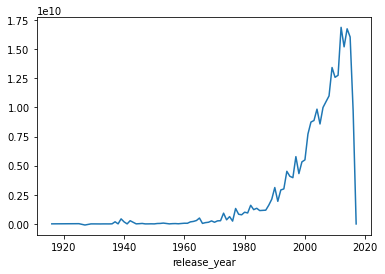

In [50]:
movies.groupby("release_year")["profit"].sum().plot()

## Q4

In [56]:
movies.sort_values("profit", ascending=False).loc[0, "original_title"]

'Avatar'

## Q5

### Trouver le mot le plus présent dans les synopsis de films

![Method q5](q5.jpg "")

In [61]:
# from collections import Counter

In [60]:
movies["overview"]

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [62]:
movies["overview"].str.split(" ")

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couple's, honeymoon, is, upended...
4800    ["Signed,, Sealed,, Delivered", introduces, a,...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4803, dtype: object

In [71]:
from collections import Counter
(
    movies["overview"]
        .fillna("")
        .str.split(" ")
        .apply(lambda x: Counter(x))
)

0       {'In': 1, 'the': 2, '22nd': 1, 'century,': 1, ...
1       {'Captain': 1, 'Barbossa,': 1, 'long': 1, 'bel...
2       {'A': 1, 'cryptic': 1, 'message': 1, 'from': 1...
3       {'Following': 1, 'the': 5, 'death': 1, 'of': 1...
4       {'John': 1, 'Carter': 2, 'is': 1, 'a': 2, 'war...
                              ...                        
4798    {'El': 2, 'Mariachi': 2, 'just': 1, 'wants': 1...
4799    {'A': 1, 'newlywed': 1, 'couple's': 1, 'honeym...
4800    {'"Signed,': 1, 'Sealed,': 1, 'Delivered"': 1,...
4801    {'When': 1, 'ambitious': 1, 'New': 1, 'York': ...
4802    {'Ever': 1, 'since': 1, 'the': 1, 'second': 1,...
Name: overview, Length: 4803, dtype: object

In [83]:
from collections import Counter
all_counts = (
    movies["overview"]
        .fillna("")
        .str.split(" ")
        .apply(lambda x: Counter(x))
        .apply(lambda x: x.items())
)

In [84]:
result = pd.DataFrame()
result["word"] = all_counts.explode().apply(lambda x: x[0])
result["count"] = all_counts.explode().apply(lambda x: x[1])

In [88]:
result["word"] = result["word"].str.lower()

In [91]:
result.groupby("word")["count"].sum().sort_values(ascending=False)

word
the          13779
a            10430
to            7912
and           7328
of            6855
             ...  
guglione,        1
guffman"         1
guessing         1
guess:           1
−                1
Name: count, Length: 34283, dtype: int64